## Machine Learning - Data Fundamentals Final Project
---
#### By Matt Hanson 


[Follow along on Github](https://github.com/matthewellishanson/datafun-07-ml)


In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

### Part 1 - Chart a Straight Line

In this section, we will chart a straight line showing a simple linear regression between Fahrenheit temperatures and Month-Year from the dataset `data/ave_hi_nyc_jan_1895-2018.csv`.

Steps:
1. Load the dataset.
2. Extract the relevant columns (Month-Year and Fahrenheit temperatures).
3. Perform a simple linear regression.
4. Plot the regression line along with the data points.


#### Setting up temps dataframe, relationship between Farenheit and Celsius temperatures

In [9]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [11]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [12]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

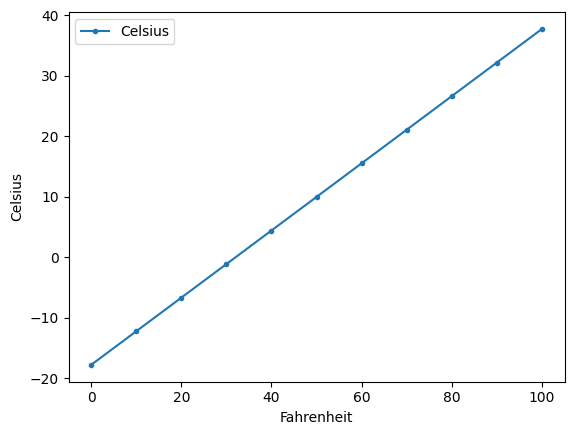

In [13]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

In [17]:
# import and preview NYC temperature data
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [18]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Cleaning the Data

In [19]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [22]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [21]:
nyc.Date.dtype
nyc.Date = nyc.Date.floordiv(100)

In [23]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Calculating Basic Descriptive Stats

In [25]:
pd.options.display.precision = 2

In [26]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Part 2: Prediction

#### Forecasting Future January Average Highs

In [27]:
from scipy import stats

In [28]:
# set up linear regression, get slope
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [29]:
# get y-intercept
linear_regression.intercept

np.float64(8.694993233674289)

In [30]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

In [31]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

#### Plotting the Average High Temperatures and a Regression Line

In [32]:
sns.set_style('whitegrid')

(10.0, 70.0)

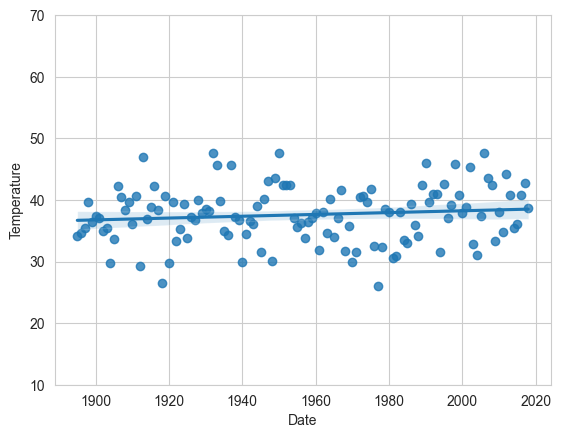

In [33]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

### Part 3 - Prediction

#### Splitting the Data for Training and Testing

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [36]:
X_train.shape

(93, 1)

In [37]:
X_test.shape

(31, 1)

#### Training the Model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
linear_regression = LinearRegression()

In [40]:
# fit the model to the training data
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [41]:
linear_regression.coef_

array([0.01939167])

In [42]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

#### Testing the Model

In [45]:
# test the model on the test data
predicted = linear_regression.predict(X_test)

In [46]:
expected = y_test

In [48]:
# plot the predicted values against the expected values for first 6 values
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


#### Predicting Future Temperatures and Estimating Past Temperatures

In [50]:
# lambda function to return the predicted values, based on the linear regression model using coef as m and intercept as b
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [51]:
predict(2020)

array([38.86338185])

In [52]:
predict(1890)

array([36.34246432])

In [53]:
predict(2025)

array([38.96034022])

In [55]:
predict(2024)

array([38.94094855])

In [54]:
predict(2035)

array([39.15425695])

#### Visualizing the Dataset with the Regression Line

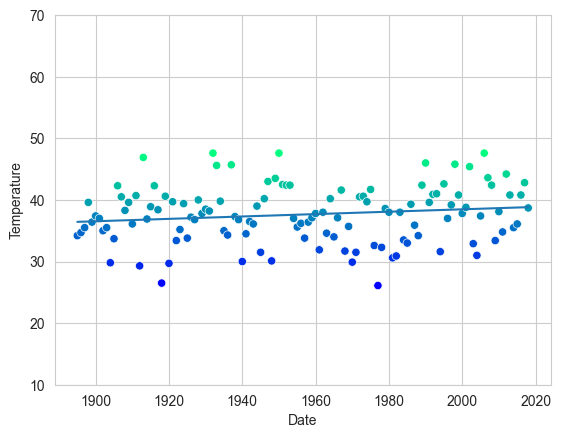

In [56]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

line = plt.plot(x, y)

#### Insights

Both methods get the job done, but Scikit-learn allows for better testing and is better for more complex projects.

For quick, simpler machine learning, scipy is very efficient as a library. But for more in-depth, complicated or exacting projects, I would go with scikit-learn's model. 